18.0 63.25


,Ozone,Temp,O_norm,T_norm
0,41.0,67,0.330579,0.250
1,36.0,72,0.289256,0.375
2,12.0,74,0.090909,0.425
3,18.0,62,0.140496,0.125
5,28.0,66,0.223140,0.225
...,...,...,...,...
147,14.0,63,0.107438,0.150
148,30.0,70,0.239669,0.325
150,14.0,75,0.107438,0.450
151,18.0,76,0.140496,0.475


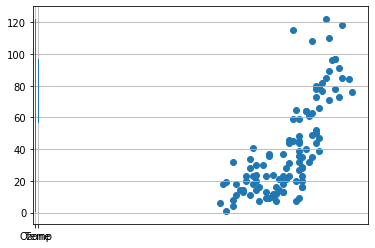

In [46]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("./data/ozone.csv")
df = df[["Ozone","Temp"]]
df.shape
df = df.dropna(how="any",inplace=False)
df.shape

### 여기까지 결측치 처리 완료(값 다 날려줌) / 이제 이상치 처리 ###

q1, q3 = np.percentile(df["Ozone"],[25,75])
print(q1,q3)

iqr = q3-q1

upper = q3 + iqr*1.5
mask = df["Ozone"] > upper

df = df.loc[~mask]

df.boxplot()

plt.scatter(df["Temp"],df["Ozone"])  # 산점도를 통해 선형관계 있음을 확인

df["O_norm"] = (df["Ozone"]-df["Ozone"].min())/(df["Ozone"].max()-df["Ozone"].min())
df["T_norm"] = (df["Temp"]-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
df



In [47]:
# 머신러닝 해보자!!
# 1. training data set
x_data = df["T_norm"]
y_data = df["O_norm"]

# 2. placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 3. weight & bias
W = tf.Variable(tf.random_normal([1]),name = 'weight')
b = tf.Variable(tf.random_normal([1]),name = 'bias')

# 4. hypothesis
H = W*x + b

# 5. cost
cost = tf.reduce_mean(tf.square(H-y))

# 6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 최적의 W를 찾아가는 과정을 우리가 만드는 것(?)

# 7. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 8. 학습
## 가장 최상단에 있는 train을 run하지 않으면 다른 값들을 얻을 수 없음. 따라서 train값은 따로 안 구하지만
## 실행은 시켜줘야한다

for step in range(3000):
    _, cost_val = sess.run([train,cost],
                           feed_dict = {x: x_data,
                                       y: y_data})
    if step % 300 == 0:
        print("cost 값은 : {}".format(cost_val))

# 이제 특정한 값을 넣어 특정 온도에서의 오존량 예측해보자
# 온도 80에서의 오존량을 알아보자
# x_data는 정규화된 자료이기 때문에 알아볼 온도 또한 정규화 작업 필요
var = (80 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())

sess.run(H, feed_dict={x: var})


cost 값은 : 0.14396077394485474
cost 값은 : 0.036003515124320984
cost 값은 : 0.03195443004369736
cost 값은 : 0.029567593708634377
cost 값은 : 0.028160588815808296
cost 값은 : 0.027331212535500526
cost 값은 : 0.026842303574085236
cost 값은 : 0.026554107666015625
cost 값은 : 0.026384221389889717
cost 값은 : 0.026284078136086464


array([0.36568302], dtype=float32)

In [43]:
# 단순선형회귀(simple linear regression)
# 데이터는 온도에 따른 오존량의 측정치를 이용해요!
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. data loading (raw data loading)
df = pd.read_csv("./data/ozone.csv")

# 2. 데이터의 전처리를 진행(Data pre processing)
# 2-1. 필요한 column부터 추출
df = df[["Ozone","Temp"]] # fancy indexing
# df.shape()

# 2-2. 결측치 처리
df = df.dropna(how="any",inplace=False)
df.shape

# 2-3. 이상치 처리 (Turkey Fences방식이용 - IQR기반)
# 이상치가 존재하는지 확인 => boxplot으로 확인
# plt.boxplot(df["Ozone"]) => 이상치가 존재해요
# IQR 값을 구해서 이를 이용해 상위, 하위 이상치의 바운더리르 계산
# IQR = 3사분위값 - 1사분위값
# plt.boxplot(df["Ozone"])
q1,q3 = np.percentile(df["Ozone"],[25,75])
iqr = q3-q1

upper = q3 + iqr*1.5        # 131.125가 상위 이상치를 처리하기 위한 경계값
mask = df["Ozone"] > upper  # boolean mask를 생성
df = df.loc[~mask]          # (114, 2)
display(df)

# 2-4. 데이터가 선형적 관계에 있는지를 확인
# scatter(산점도)를 이용히면 데이터의 관계를 쉽게 파악할 수 있어요
# plt.scatter(df["Temp"],df["Ozone"])

# 2-5. 정형화 혹은 표준화를 이용해서 데이터의 scale을 변환
# 정규화(Normalization) = (요소값 - 최소값) / (최대값 - 최소값)
# => 모든 데이터가 0과 1사이의 값으로 scaling

# 표준화(Standardization) = (요소값 - 평균) / 표준편차
# 정규화 방식을 이용해서 데이터를 변형
# 일반적으로는 module을 이용, 우리는 프로그램으로 처리

df["Temp_Norm"] = (df["Temp"] - df["Temp"].min()) / (df["Temp"].max()-df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"] - df["Ozone"].min()) / (df["Ozone"].max()-df["Ozone"].min())
display(df.head())

# 학습에 적합한 데이터를 완성!

# 머신 러닝(Tensorflow)

# 1. training data set
x_data = df["Temp_Norm"]
y_data = df["Ozone_Norm"]

# 2. placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 3. weight & bias
W = tf.Variable(tf.random_normal([1]),name = "weight")
b = tf.Variable(tf.random_normal([1]),name = "bias")

# 4. hypothesis
H = W * x + b

# 5. cost function
cost = tf.reduce_mean(tf.square(H-y))  # linear에서는 최소제곱 사용! 로지스틱에선 달라진다

# 6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 최적의 W를 찾아가는 과정을 우리가 만드는 것(?)

# 7. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 8. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],
                          feed_dict = {x: x_data,
                                       y: y_data})
    if step % 300 == 0:
        print("cost 값 : {}".format(cost_val))

##################################
# 최적의 W와 b를 구했어요! => 가설을 완성

# prediction 특정값에 대해 예측해보는 차례!
# 온도가 화씨 80일때 오존량을 알고 싶어요!
sess.run(H, feed_dict = {x : 80})
# 이렇게 처리하면 문제가 있다!
# 80이라는 온도를 0-1사이의 값으로 scale
tmp = (80 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())

print(tmp)
print(sess.run(H, feed_dict={x : tmp})) # 0.36(ozone)
result_scale = sess.run(H, feed_dict={x : tmp})
print(result_scale)
result = result_scale * (df["Ozone"].max()-df["Ozone"].min())

print(result)  # 45

####################################################
# scipy의 stats module을 이용해서 편하게 처리
# x = df["Temp"]
# y = df["Ozone"]

# result = stats.linregress(x,y)
# print(result)

# print(80 * result[0] + result[1])



,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


,Ozone,Temp,Temp_Norm,Ozone_Norm
0,41.0,67,0.250,0.330579
1,36.0,72,0.375,0.289256
2,12.0,74,0.425,0.090909
3,18.0,62,0.125,0.140496
5,28.0,66,0.225,0.223140


cost 값 : 0.04201672971248627
cost 값 : 0.02969193086028099
cost 값 : 0.028233898803591728
cost 값 : 0.027374418452382088
cost 값 : 0.02686777524650097
cost 값 : 0.026569120585918427
cost 값 : 0.026393070816993713
cost 값 : 0.02628929726779461
cost 값 : 0.02622811868786812
cost 값 : 0.026192057877779007
0.575
[0.36761552]
[0.36761552]
[44.48148]


In [53]:
# scipy의 stats module을 이용해서 편하게 처리
x = df["Temp"]
y = df["Ozone"]

result = stats.linregress(x,y)
print(result)
print(result[0]*80 + result[1])


LinregressResult(slope=2.344807849550286, intercept=-142.19084219133276, rvalue=0.7515377011359844, pvalue=5.802324426210489e-22, stderr=0.19448560867502498)
45.39378577269011


In [125]:
## multiple linear regression(다중선형회귀)
## 독립변수가 2개 이상인 경우
## Hypothesis가 변경
## 단순선형회귀 => H = Wx + b

## 다중선형회귀 => H = W1x1 + W2x2 + ... + b
## 결국 matrix형태로 W와 x가 표현돼요!
## H = matmul(X,W) + b  # ★★들어오는 x데이터가 가로로 되어 있기 때문에 x가 w보다 앞에 있는 것!!★★

# 퀴즈성적을 이용한 최종시험성적 예측
# 사용하는 데이터
# 퀴즈1 퀴즈2 퀴즈3 최종성적
# 73    80   75   152
# 93    88   93   185
# 89    91   90   180
# 96    98   100  196
# 73    66   70   142
# 80    90   50   ?? (prediction)

# training data set
x_data = [[73,80,75],
          [93,88,93],
          [89,91,90],
          [96,98,100],
          [73,66,70]]

y_data = [[152],[185],[180],[196],[142]]

# placeholder
# 1차원이 아닌 경우에는 반드시 shape을 잡아줘야 한다!
# X = tf.placeholder(shape=[5,3],dtype=tf.float32)
# 우리의 예제 데이터는 열고정 형태의 데이터
# [5,3]으로 shape을 잡아주면 나중에 예측할 때도 예측하고 싶은 데이터를 5행3열짜리로 입력해줘야 값이 나온다
# 1행3열짜리를 입력해도 예측값을 도출하기 위해, 어떤 과정이 필요할까? => None 사용!

X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)
# 다중회귀에서는 shape 제대로 설정해주는 것 무척 중요하다!!

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]),name = "weight")
b = tf.Variable(tf.random_normal([1]),name = "bias")

# Hypothesis (행렬곱 연산의 형태로 가설 설정)
H = tf.matmul(X,W) + b  # 순서 주의!!!!

# Cost function
cost=tf.reduce_mean(tf.square(H-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 8. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],
                          feed_dict = {X: x_data,
                                       Y: y_data})
    if step % 300 == 0:
        print("cost 값 : {}".format(cost_val))

# 80    90   50 일떄의 점수는?
result = sess.run(H, feed_dict = {X : [[80,90,50]]})
print(result)
# print(tmp)
# print(sess.run(H, feed_dict={x : tmp})) # 0.36(ozone)
# result_scale = sess.run(H, feed_dict={x : tmp})
# result = result_scale * (df["Ozone"].max()-df["Ozone"].min())

# print(result)  # 45

# ####################################################
# # scipy의 stats module을 이용해서 편하게 처리
# x = df["Temp"]
# y = df["Ozone"]

# result = stats.linregress(x,y)
# print(result)

# print(80 * result[0] + result[1])


cost 값 : 119299.9765625
cost 값 : nan
cost 값 : nan
cost 값 : nan
cost 값 : nan
cost 값 : nan
cost 값 : nan
cost 값 : nan
cost 값 : nan
cost 값 : nan
[[nan]]


,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


(111, 4)
(108, 4)
(106, 4)


,Ozone,Solar.R,Wind,Temp,Ozone_Norm,Solar.R_Norm,Wind_Norm,Temp_Norm
0,41.0,190.0,7.4,67,0.330579,0.559633,0.356643,0.230769
1,36.0,118.0,8.0,72,0.289256,0.339450,0.398601,0.358974
2,12.0,149.0,12.6,74,0.090909,0.434251,0.720280,0.410256
3,18.0,313.0,11.5,62,0.140496,0.935780,0.643357,0.102564
6,23.0,299.0,8.6,65,0.181818,0.892966,0.440559,0.179487
...,...,...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,0.107438,0.039755,1.000000,0.128205
148,30.0,193.0,6.9,70,0.239669,0.568807,0.321678,0.307692
150,14.0,191.0,14.3,75,0.107438,0.562691,0.839161,0.435897
151,18.0,131.0,8.0,76,0.140496,0.379205,0.398601,0.461538


cost 값 : 5.575356960296631
cost 값 : 0.021426495164632797
cost 값 : 0.02011575922369957
cost 값 : 0.020016739144921303
cost 값 : 0.020005695521831512
cost 값 : 0.020004458725452423
cost 값 : 0.02000432275235653
cost 값 : 0.020004304125905037
cost 값 : 0.02000429667532444
cost 값 : 0.020004302263259888
cost 값 : 0.020004302263259888
[0.4984709480122324, 0.35664335664335667, 0.23076923076923078]
[[26.973396]]


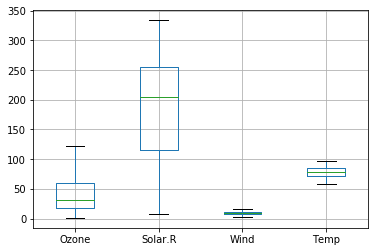

In [134]:
## 다중선형회귀 연습문제
## 관측된 Solar.R, Wind, Temp에 대한 Ozone량에 대한 데이터를 이용하여 머신러닝을 진행하고
## Solar.R : 170, Wind : 7.4, Temp : 67.0에 대한
## 오존 수치를 예측하시오 => 27.9
## 정답에 근사한 값을 알아보아요!
## sklearn module을 이용해서 학습시키고 예측까지 수행

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. data loading (raw data loading)
df1 = pd.read_csv("./data/ozone.csv")

# 2. 데이터의 전처리를 진행(Data pre processing)
# 2-1. 필요한 column부터 추출
df1 = df1[["Ozone","Solar.R", "Wind", "Temp"]]

# df.shape()
# 2-2. 결측치 처리
df1 = df1.dropna(how="any",inplace=False)
display(df1)
print(df1.shape)

# 이상치처리
#df1.boxplot()
q1_wi,q3_wi = np.percentile(df1["Wind"],[25,75])
iqr_wi = q3_wi-q1_wi

upper_wi = q3_wi + iqr_wi*1.5        # 131.125가 상위 이상치를 처리하기 위한 경계값
mask_wi = df1["Wind"] > upper_wi  # boolean mask를 생성
df1 = df1.loc[~mask_wi]
print(df1.shape)

q1_oz,q3_oz = np.percentile(df1["Ozone"],[25,75])
iqr_oz = q3_oz-q1_oz

upper_oz = q3_oz + iqr_oz*1.5        # 131.125가 상위 이상치를 처리하기 위한 경계값
mask_oz = df1["Ozone"] > upper_oz  # boolean mask를 생성
df1 = df1.loc[~mask_oz]         
print(df1.shape)
df1.boxplot()

df1["Ozone_Norm"] = (df1["Ozone"] - df1["Ozone"].min()) / (df1["Ozone"].max()-df1["Ozone"].min())
df1["Solar.R_Norm"] = (df1["Solar.R"] - df1["Solar.R"].min()) / (df1["Solar.R"].max()-df1["Solar.R"].min())
df1["Wind_Norm"] = (df1["Wind"] - df1["Wind"].min()) / (df1["Wind"].max()-df1["Wind"].min())
df1["Temp_Norm"] = (df1["Temp"] - df1["Temp"].min()) / (df1["Temp"].max()-df1["Temp"].min())

display(df1)

# training data set
x_data = df1[["Solar.R_Norm","Wind_Norm","Temp_Norm"]]
y_data = df1[["Ozone_Norm"]]

X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

W = tf.Variable(tf.random_normal([3,1]),name = "weight")
b = tf.Variable(tf.random_normal([1]),name = "bias")

# Hypothesis (행렬곱 연산의 형태로 가설 설정)
H = tf.matmul(X,W) + b  # 순서 주의!!!!

# Cost function
cost = tf.reduce_mean(tf.square(H-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 8. 학습
for step in range(33000):
    _, cost_val = sess.run([train,cost],
                          feed_dict = {X: x_data,
                                       Y: y_data})
    if step % 3000 == 0:
        print("cost 값 : {}".format(cost_val))
        
tmp = [(170 - df1["Solar.R"].min()) / (df1["Solar.R"].max()-df1["Solar.R"].min()),
       (7.4 - df1["Wind"].min()) / (df1["Wind"].max()-df1["Wind"].min()),
       (67.0 - df1["Temp"].min()) / (df1["Temp"].max()-df1["Temp"].min())
      ]

print(tmp)
result_scale = sess.run(H, feed_dict={X : [tmp]})
result = result_scale * (df["Ozone"].max()-df["Ozone"].min())

print(result)  # 약 27.9


In [146]:
## 위와 동일한 문제를 다른 방법으로 풀어보기
## sklearn module을 이용해서 학습시키고 예측까지 수행

from sklearn import linear_model
import numpy as np
import pandas as pd

df = pd.read_csv("./data/ozone.csv")
df = df[["Ozone","Solar.R","Wind","Temp"]]
df = df.dropna(how="any",inplace = False)

q1,q3 = np.percentile(df["Ozone"],[25,75])
iqr = q3-q1

upper = q3 + iqr*1.5        # 131.125가 상위 이상치를 처리하기 위한 경계값
mask = df["Ozone"] > upper  # boolean mask를 생성
df = df.loc[~mask]          # (114, 2)

display(df)

q1,q3 = np.percentile(df["Wind"],[25,75])
iqr = q3-q1

upper = q3 + iqr*1.5        # 131.125가 상위 이상치를 처리하기 위한 경계값
mask = df["Wind"] > upper  # boolean mask를 생성
df = df.loc[~mask]          # (114, 2)

print(df.shape)
display(df)

# machine learning
X = df[["Solar.R","Wind","Temp"]]
Y = df["Ozone"]

lm = linear_model.LinearRegression()
lm.fit(X,Y)

prediction = lm.predict([[170,7.4,67]])
print("예측값은 : {}".format(prediction))

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


(106, 4)


,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


예측값은 : [27.97594664]


In [158]:
## 다중선형회귀
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./data/ozone.csv")

df = df.dropna(how="any",inplace=False)

q1,q3 = np.percentile(df["Ozone"],[25,75])
iqr = q3-q1

upper = q3 + iqr*1.5        # 131.125가 상위 이상치를 처리하기 위한 경계값
mask = df["Ozone"] > upper  # boolean mask를 생성
df = df.loc[~mask]

# 데이터 정규화
x_data = df[["Solar.R","Wind","Temp"]]
x_data = MinMaxScaler().fit_transform(x_data)

y_data = df["Ozone"].values.reshape(-1,1)
y_data = MinMaxScaler().fit_transform(y_data)

print(x_data,y_data)


[[0.55963303 0.27717391 0.25      ]
 [0.33944954 0.30978261 0.375     ]
 [0.43425076 0.55978261 0.425     ]
 [0.93577982 0.5        0.125     ]
 [0.89296636 0.3423913  0.2       ]
 [0.28134557 0.625      0.05      ]
 [0.03669725 0.9673913  0.1       ]
 [0.76146789 0.40217391 0.3       ]
 [0.86544343 0.375      0.225     ]
 [0.81651376 0.4673913  0.275     ]
 [0.17737003 0.5923913  0.025     ]
 [1.         0.5        0.175     ]
 [0.91743119 0.52717391 0.225     ]
 [0.21712538 0.875      0.        ]
 [0.96330275 0.5        0.275     ]
 [0.11314985 0.40217391 0.125     ]
 [0.0030581  0.40217391 0.05      ]
 [0.95718654 0.77717391 0.4       ]
 [0.05504587 0.40217391 0.1       ]
 [0.25993884 0.52717391 0.1       ]
 [0.01834862 0.52717391 0.25      ]
 [0.74923547 0.68478261 0.6       ]
 [0.66055046 0.18478261 0.55      ]
 [0.83180428 0.27717391 0.475     ]
 [0.36697248 0.40217391 0.625     ]
 [0.86850153 0.625      0.825     ]
 [0.96636086 0.5        0.75      ]
 [0.43119266 0.30978261 0.62

In [168]:
## 지도학습
##  1. linear regression(선형회귀)
##     단순 선형 회귀(simple linear regression)
##     다중 선형 회귀(multiple linear regression)

##  2. logistic regression(binary classification) -> 기반
##     알고리즘 중 가장 보편화되고 정확한 알고리즘
##     Email이 스팸인지 아닌지를 판별
##     내일의 주가가 오를지 떨어질지를 판별
##     신용카드 사용 시 도난카드인지 아닌지를 판별
##  y lable이 0 혹은 1(True or False)
##  machine learning의 결과는 확률로 나타나요!
##  0~1사이의 값으로 출력. 일반적으로 0.5이상이면 1로 간주, 0.5미만이면 0으로 간주

#     x(시간)    y(시험결과)
#         1     Fail(0) => 15
#         2     Fail(0) => 20
#         5     Fail(0) => 56
#         8     Pass(1) => 85
#         10    Pass(1) => 93
#         20    Pass(1)

## linear regression으로 학습한 후 7시간 공부한 결과를 알아보아요
import tensorflow as tf

x_data = [1,2,5,8,10,20]
y_data = [0,0,0,1,1,1]

x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

H = W * x + b

cost = tf.reduce_mean(tf.square(H-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
    _, cost_val = sess.run([train,cost],
                           feed_dict = {x :x_data,
                                        y: y_data})
    if step % 3000 ==0:
        print("cost 값은 : {}".format(cost_val))
    
print(sess.run(H,feed_dict= {x:6}))  # 0.6 => 0.5보다 크면 합격
### 큰 문제없이 판단할 수 있을 것 같아요...!
### 하지만 너무 크거나 너무 작은 값이 학습 데이터에 포함되면 linear regression으로는 정확한 판단 불가능
### => 그래서 나온게 logistic regression




cost 값은 : 135.88294982910156
cost 값은 : 0.09461325407028198
cost 값은 : 0.09461325407028198
cost 값은 : 0.09461325407028198
cost 값은 : 0.09461325407028198
cost 값은 : 0.09461325407028198
cost 값은 : 0.09461325407028198
cost 값은 : 0.09461325407028198
cost 값은 : 0.09461325407028198
cost 값은 : 0.09461325407028198
[0.39640763]
